In [22]:
# Import library needed
import pandas as pd
import matplotlib.pyplot as plt
import sqlite3
import warnings
import seaborn as sns
from datetime import date, timedelta

# Ignore warnings generated by libraries
warnings.filterwarnings("ignore")

# Default seaborn plot colors palette
sns.set_palette('muted')

In [23]:
con = sqlite3.connect("D:\Self Development\Pacmann\Data Wrangling\ProjectDataWranglingPacmann\Dataset\olist.db")
cur = con.cursor()

In [24]:
# Execute connection and get all table's names

cur.execute("SELECT name FROM sqlite_master WHERE type='table';")

print(cur.fetchall())

[('olist_order_customer_dataset',), ('olist_order_dataset',), ('olist_order_reviews_dataset',), ('olist_order_payments_dataset',), ('olist_order_items_dataset',), ('olist_products_dataset',), ('olist_sellers_dataset',), ('olist_geolocation_dataset',), ('product_category_name_translation',)]


In [25]:

# Convert each tables into pandas dataframes

df_order_payments_dataset = pd.read_sql("SELECT * FROM olist_order_payments_dataset", con)
df_olist_order_items_dataset =pd.read_sql("SELECT * FROM olist_order_items_dataset", con)
df_olist_order_reviews_dataset = pd.read_sql("SELECT * FROM olist_order_reviews_dataset", con)
df_olist_order_customer_dataset = pd.read_sql("SELECT * FROM olist_order_customer_dataset", con)
df_olist_order_dataset =pd.read_sql("SELECT * FROM olist_order_dataset", con)
df_olist_products_dataset = pd.read_sql("SELECT * FROM olist_products_dataset", con)
df_olist_sellers_dataset =pd.read_sql("SELECT * FROM olist_sellers_dataset", con)
df_olist_geolocation_dataset = pd.read_sql("SELECT * FROM olist_geolocation_dataset", con)


df_olist_order_items_dataset
df_order_payments_dataset
df_olist_products_dataset

,index,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0
...,...,...,...,...,...,...,...,...,...,...
32946,32946,a0b7d5a992ccda646f2d34e418fff5a0,moveis_decoracao,45.0,67.0,2.0,12300.0,40.0,40.0,40.0
32947,32947,bf4538d88321d0fd4412a93c974510e6,construcao_ferramentas_iluminacao,41.0,971.0,1.0,1700.0,16.0,19.0,16.0
32948,32948,9a7c6041fa9592d9d9ef6cfe62a71f8c,cama_mesa_banho,50.0,799.0,1.0,1400.0,27.0,7.0,27.0
32949,32949,83808703fc0706a22e264b9d75f04a2e,informatica_acessorios,60.0,156.0,2.0,700.0,31.0,13.0,20.0


In [26]:
# Merge needed dataframes into a single one

olist = df_olist_order_items_dataset.merge(df_order_payments_dataset, on='order_id', how="outer").merge(df_olist_products_dataset, on="product_id", how="outer")

olist

,index_x,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,index_y,payment_sequential,...,payment_value,index,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,0.0,00010242fe8c5a6d1ba2dd792cb16214,1.0,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.9,13.29,85283.0,1.0,...,72.19,25865.0,cool_stuff,58.0,598.0,4.0,650.0,28.0,9.0,14.0
1,8346.0,130898c0987d1801452a8ed92a670612,1.0,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-07-05 02:44:11,55.9,17.96,39274.0,1.0,...,73.86,25865.0,cool_stuff,58.0,598.0,4.0,650.0,28.0,9.0,14.0
2,36646.0,532ed5e14e24ae1f0d735b91524b98b9,1.0,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2018-05-23 10:56:25,64.9,18.33,87067.0,1.0,...,83.23,25865.0,cool_stuff,58.0,598.0,4.0,650.0,28.0,9.0,14.0
3,49108.0,6f8c31653edb8c83e1a739408b5ff750,1.0,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-08-07 18:55:08,58.9,16.17,47987.0,1.0,...,75.07,25865.0,cool_stuff,58.0,598.0,4.0,650.0,28.0,9.0,14.0
4,55021.0,7d19f4ef4d04461989632411b7e588b9,1.0,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-08-16 22:05:11,58.9,13.29,38405.0,1.0,...,72.19,25865.0,cool_stuff,58.0,598.0,4.0,650.0,28.0,9.0,14.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
118429,NaN,fc20b8e282da6f3fbcdd3a3cedecb723,NaN,NaN,NaN,NaN,NaN,NaN,103718.0,1.0,...,3782.19,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
118430,NaN,92fca7ed7b7df4695007bd7f227e3333,NaN,NaN,NaN,NaN,NaN,NaN,103728.0,1.0,...,52.57,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
118431,NaN,b17fd4c033b06e8d888de8ea6105ef9d,NaN,NaN,NaN,NaN,NaN,NaN,103766.0,1.0,...,103.10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
118432,NaN,974f9f87a3bad01b2ac72fe987505e9b,NaN,NaN,NaN,NaN,NaN,NaN,103807.0,1.0,...,91.18,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [27]:
print(type(olist))

<class 'pandas.core.frame.DataFrame'>


In [28]:
(olist.isna().sum() / len(olist)) *100

index_x                       0.700812
order_id                      0.000000
order_item_id                 0.700812
product_id                    0.700812
seller_id                     0.700812
shipping_limit_date           0.700812
price                         0.700812
freight_value                 0.700812
index_y                       0.002533
payment_sequential            0.002533
payment_type                  0.002533
payment_installments          0.002533
payment_value                 0.002533
index                         0.700812
product_category_name         2.134522
product_name_lenght           2.134522
product_description_lenght    2.134522
product_photos_qty            2.134522
product_weight_g              0.717699
product_length_cm             0.717699
product_height_cm             0.717699
product_width_cm              0.717699
dtype: float64

In [29]:
olist.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 118434 entries, 0 to 118433
Data columns (total 22 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   index_x                     117604 non-null  float64
 1   order_id                    118434 non-null  object 
 2   order_item_id               117604 non-null  float64
 3   product_id                  117604 non-null  object 
 4   seller_id                   117604 non-null  object 
 5   shipping_limit_date         117604 non-null  object 
 6   price                       117604 non-null  float64
 7   freight_value               117604 non-null  float64
 8   index_y                     118431 non-null  float64
 9   payment_sequential          118431 non-null  float64
 10  payment_type                118431 non-null  object 
 11  payment_installments        118431 non-null  float64
 12  payment_value               118431 non-null  float64
 13  index         

In [42]:
olist.dropna(inplace=True)


In [44]:
olist.info()
olist

<class 'pandas.core.frame.DataFrame'>
Int64Index: 115902 entries, 0 to 117603
Data columns (total 22 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   index_x                     115902 non-null  float64
 1   order_id                    115902 non-null  object 
 2   order_item_id               115902 non-null  float64
 3   product_id                  115902 non-null  object 
 4   seller_id                   115902 non-null  object 
 5   shipping_limit_date         115902 non-null  object 
 6   price                       115902 non-null  float64
 7   freight_value               115902 non-null  float64
 8   index_y                     115902 non-null  float64
 9   payment_sequential          115902 non-null  float64
 10  payment_type                115902 non-null  object 
 11  payment_installments        115902 non-null  float64
 12  payment_value               115902 non-null  float64
 13  index         

,index_x,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,index_y,payment_sequential,...,payment_value,index,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,0.0,00010242fe8c5a6d1ba2dd792cb16214,1.0,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.9,13.29,85283.0,1.0,...,72.19,25865.0,cool_stuff,58.0,598.0,4.0,650.0,28.0,9.0,14.0
1,8346.0,130898c0987d1801452a8ed92a670612,1.0,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-07-05 02:44:11,55.9,17.96,39274.0,1.0,...,73.86,25865.0,cool_stuff,58.0,598.0,4.0,650.0,28.0,9.0,14.0
2,36646.0,532ed5e14e24ae1f0d735b91524b98b9,1.0,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2018-05-23 10:56:25,64.9,18.33,87067.0,1.0,...,83.23,25865.0,cool_stuff,58.0,598.0,4.0,650.0,28.0,9.0,14.0
3,49108.0,6f8c31653edb8c83e1a739408b5ff750,1.0,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-08-07 18:55:08,58.9,16.17,47987.0,1.0,...,75.07,25865.0,cool_stuff,58.0,598.0,4.0,650.0,28.0,9.0,14.0
4,55021.0,7d19f4ef4d04461989632411b7e588b9,1.0,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-08-16 22:05:11,58.9,13.29,38405.0,1.0,...,72.19,25865.0,cool_stuff,58.0,598.0,4.0,650.0,28.0,9.0,14.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
117599,112613.0,ffebd80e3291e811c308365936897efd,1.0,4cc4d02efc8f249c13355147fb44e34d,d1c7fa84e48cfa21a0e595167c1c500e,2018-07-18 20:23:55,129.9,51.20,93924.0,1.0,...,181.10,29144.0,ferramentas_jardim,37.0,653.0,1.0,6700.0,35.0,12.0,22.0
117600,112619.0,ffee31fb4b5e35c9123608015637c495,1.0,b10ecf8e33aaaea419a9fa860ea80fb5,0241d4d5d36f10f80c644447315af0bd,2018-08-21 10:10:11,99.0,13.52,12665.0,1.0,...,112.52,23588.0,moveis_decoracao,30.0,308.0,1.0,2300.0,37.0,30.0,20.0
117601,112632.0,fff7c4452f050315db1b3f24d9df5fcd,1.0,dd469c03ad67e201bc2179ef077dcd48,7e93a43ef30c4f03f38b393420bc753a,2017-06-07 17:05:23,736.0,20.91,367.0,1.0,...,756.91,7898.0,relogios_presentes,33.0,658.0,3.0,400.0,19.0,9.0,15.0
117602,112637.0,fffa82886406ccf10c7b4e35c4ff2788,1.0,bbe7651fef80287a816ead73f065fc4b,8f2ce03f928b567e3d56181ae20ae952,2017-12-22 17:31:42,229.9,44.02,48651.0,1.0,...,273.92,28548.0,esporte_lazer,32.0,280.0,2.0,2700.0,60.0,15.0,15.0


In [52]:
olist.describe()

,index_x,order_item_id,price,freight_value,index_y,payment_sequential,payment_installments,payment_value,index,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
count,115902.000000,115902.000000,115902.000000,115902.000000,115902.000000,115902.000000,115902.000000,115902.000000,115902.000000,115902.000000,115902.000000,115902.000000,115902.000000,115902.000000,115902.000000,115902.000000
mean,56277.228667,1.196304,77.197445,20.075433,51944.987153,1.092820,2.945350,173.020069,16546.721334,48.767493,786.950182,2.207874,2117.675459,30.310279,16.658211,23.110179
std,32529.208743,0.699508,47.219680,15.870027,29979.437178,0.725244,2.779846,268.078052,9559.607111,10.035000,653.039008,1.719536,3785.543670,16.224730,13.479965,11.757155
min,0.000000,1.000000,0.850000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,5.000000,4.000000,1.000000,0.000000,7.000000,2.000000,6.000000
25%,28124.250000,1.000000,39.900000,13.080000,25999.250000,1.000000,1.000000,61.010000,8290.000000,42.000000,347.000000,1.000000,300.000000,18.000000,8.000000,15.000000
50%,56248.500000,1.000000,74.900000,16.320000,51964.500000,1.000000,2.000000,108.200000,16386.000000,52.000000,601.000000,1.000000,700.000000,25.000000,13.000000,20.000000
75%,84471.000000,1.000000,99.990000,21.220000,77875.750000,1.000000,4.000000,189.720000,24931.000000,57.000000,985.000000,3.000000,1800.000000,38.000000,20.000000,30.000000
max,112649.000000,21.000000,215.000000,409.680000,103885.000000,29.000000,24.000000,13664.080000,32950.000000,76.000000,3992.000000,20.000000,40425.000000,105.000000,105.000000,118.000000


<AxesSubplot:xlabel='price', ylabel='Count'>

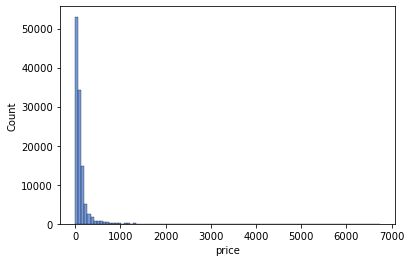

In [46]:
sns.histplot(data=olist, x="price", bins=100)

<AxesSubplot:xlabel='price', ylabel='Count'>

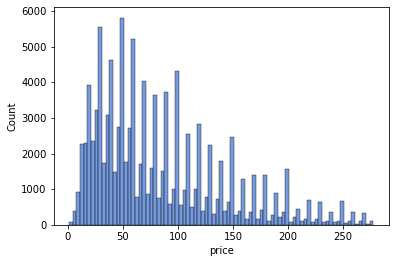

In [47]:
#batas atas price

IQR=olist["price"].quantile(q=0.75) - olist["price"].quantile(q=0.25)
batas_atas=olist["price"].quantile(q=0.75)+IQR*1.5

#plot tanpa outlier
olist_without_outlier = olist[olist["price"] < batas_atas]

#Histogram plot tanpa extreme outlier
sns.histplot(olist_without_outlier["price"])


In [49]:
#Mengganti Outlier dengan median

#Batas Atas
IQR=olist["price"].quantile(q=0.75) - olist["price"].quantile(q=0.25)
batas_atas=olist["price"].quantile(q=0.75)+IQR*1.5

#Hitung Median
median=olist["price"].median()

#Mengganti Nilai Outlier menjadi Median
olist.loc[olist['price'] > batas_atas, 'price']=median
olist


,index_x,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,index_y,payment_sequential,...,payment_value,index,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,0.0,00010242fe8c5a6d1ba2dd792cb16214,1.0,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.9,13.29,85283.0,1.0,...,72.19,25865.0,cool_stuff,58.0,598.0,4.0,650.0,28.0,9.0,14.0
1,8346.0,130898c0987d1801452a8ed92a670612,1.0,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-07-05 02:44:11,55.9,17.96,39274.0,1.0,...,73.86,25865.0,cool_stuff,58.0,598.0,4.0,650.0,28.0,9.0,14.0
2,36646.0,532ed5e14e24ae1f0d735b91524b98b9,1.0,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2018-05-23 10:56:25,64.9,18.33,87067.0,1.0,...,83.23,25865.0,cool_stuff,58.0,598.0,4.0,650.0,28.0,9.0,14.0
3,49108.0,6f8c31653edb8c83e1a739408b5ff750,1.0,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-08-07 18:55:08,58.9,16.17,47987.0,1.0,...,75.07,25865.0,cool_stuff,58.0,598.0,4.0,650.0,28.0,9.0,14.0
4,55021.0,7d19f4ef4d04461989632411b7e588b9,1.0,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-08-16 22:05:11,58.9,13.29,38405.0,1.0,...,72.19,25865.0,cool_stuff,58.0,598.0,4.0,650.0,28.0,9.0,14.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
117599,112613.0,ffebd80e3291e811c308365936897efd,1.0,4cc4d02efc8f249c13355147fb44e34d,d1c7fa84e48cfa21a0e595167c1c500e,2018-07-18 20:23:55,129.9,51.20,93924.0,1.0,...,181.10,29144.0,ferramentas_jardim,37.0,653.0,1.0,6700.0,35.0,12.0,22.0
117600,112619.0,ffee31fb4b5e35c9123608015637c495,1.0,b10ecf8e33aaaea419a9fa860ea80fb5,0241d4d5d36f10f80c644447315af0bd,2018-08-21 10:10:11,99.0,13.52,12665.0,1.0,...,112.52,23588.0,moveis_decoracao,30.0,308.0,1.0,2300.0,37.0,30.0,20.0
117601,112632.0,fff7c4452f050315db1b3f24d9df5fcd,1.0,dd469c03ad67e201bc2179ef077dcd48,7e93a43ef30c4f03f38b393420bc753a,2017-06-07 17:05:23,74.9,20.91,367.0,1.0,...,756.91,7898.0,relogios_presentes,33.0,658.0,3.0,400.0,19.0,9.0,15.0
117602,112637.0,fffa82886406ccf10c7b4e35c4ff2788,1.0,bbe7651fef80287a816ead73f065fc4b,8f2ce03f928b567e3d56181ae20ae952,2017-12-22 17:31:42,74.9,44.02,48651.0,1.0,...,273.92,28548.0,esporte_lazer,32.0,280.0,2.0,2700.0,60.0,15.0,15.0


<AxesSubplot:xlabel='price', ylabel='Count'>

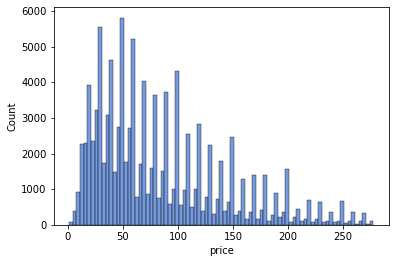

In [53]:
#Histogram plot tanpa extreme outlier
sns.histplot(olist_without_outlier["price"])

<AxesSubplot:xlabel='payment_value', ylabel='Count'>

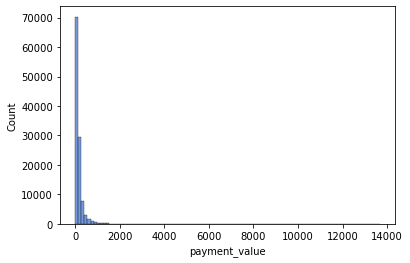

In [55]:
sns.histplot(data=olist, x="payment_value", bins=100)

<AxesSubplot:xlabel='payment_value', ylabel='Count'>

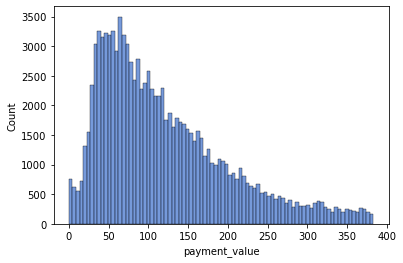

In [56]:
#batas atas Payment Value

IQR=olist["payment_value"].quantile(q=0.75) - olist["payment_value"].quantile(q=0.25)
batas_atas=olist["payment_value"].quantile(q=0.75)+IQR*1.5

#plot tanpa outlier
olist_without_outlier = olist[olist["payment_value"] < batas_atas]

#Histogram plot tanpa extreme outlier
sns.histplot(olist_without_outlier["payment_value"])



In [59]:
#Mengganti Outlier dengan median

#Batas Atas
IQR=olist["payment_value"].quantile(q=0.75) - olist["payment_value"].quantile(q=0.25)
batas_atas=olist["payment_value"].quantile(q=0.75)+IQR*1.5

#Hitung Median
median=olist["payment_value"].median()

#Mengganti Nilai Outlier menjadi Median
olist.loc[olist['payment_value'] > batas_atas, 'payment_value']=median
olist


,index_x,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,index_y,payment_sequential,...,payment_value,index,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,0.0,00010242fe8c5a6d1ba2dd792cb16214,1.0,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.9,13.29,85283.0,1.0,...,72.19,25865.0,cool_stuff,58.0,598.0,4.0,650.0,28.0,9.0,14.0
1,8346.0,130898c0987d1801452a8ed92a670612,1.0,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-07-05 02:44:11,55.9,17.96,39274.0,1.0,...,73.86,25865.0,cool_stuff,58.0,598.0,4.0,650.0,28.0,9.0,14.0
2,36646.0,532ed5e14e24ae1f0d735b91524b98b9,1.0,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2018-05-23 10:56:25,64.9,18.33,87067.0,1.0,...,83.23,25865.0,cool_stuff,58.0,598.0,4.0,650.0,28.0,9.0,14.0
3,49108.0,6f8c31653edb8c83e1a739408b5ff750,1.0,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-08-07 18:55:08,58.9,16.17,47987.0,1.0,...,75.07,25865.0,cool_stuff,58.0,598.0,4.0,650.0,28.0,9.0,14.0
4,55021.0,7d19f4ef4d04461989632411b7e588b9,1.0,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-08-16 22:05:11,58.9,13.29,38405.0,1.0,...,72.19,25865.0,cool_stuff,58.0,598.0,4.0,650.0,28.0,9.0,14.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
117599,112613.0,ffebd80e3291e811c308365936897efd,1.0,4cc4d02efc8f249c13355147fb44e34d,d1c7fa84e48cfa21a0e595167c1c500e,2018-07-18 20:23:55,129.9,51.20,93924.0,1.0,...,181.10,29144.0,ferramentas_jardim,37.0,653.0,1.0,6700.0,35.0,12.0,22.0
117600,112619.0,ffee31fb4b5e35c9123608015637c495,1.0,b10ecf8e33aaaea419a9fa860ea80fb5,0241d4d5d36f10f80c644447315af0bd,2018-08-21 10:10:11,99.0,13.52,12665.0,1.0,...,112.52,23588.0,moveis_decoracao,30.0,308.0,1.0,2300.0,37.0,30.0,20.0
117601,112632.0,fff7c4452f050315db1b3f24d9df5fcd,1.0,dd469c03ad67e201bc2179ef077dcd48,7e93a43ef30c4f03f38b393420bc753a,2017-06-07 17:05:23,74.9,20.91,367.0,1.0,...,108.20,7898.0,relogios_presentes,33.0,658.0,3.0,400.0,19.0,9.0,15.0
117602,112637.0,fffa82886406ccf10c7b4e35c4ff2788,1.0,bbe7651fef80287a816ead73f065fc4b,8f2ce03f928b567e3d56181ae20ae952,2017-12-22 17:31:42,74.9,44.02,48651.0,1.0,...,273.92,28548.0,esporte_lazer,32.0,280.0,2.0,2700.0,60.0,15.0,15.0


<AxesSubplot:xlabel='payment_value', ylabel='Count'>

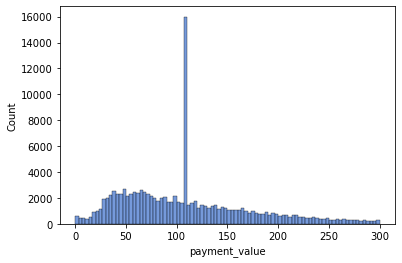

In [60]:
#Histogram plot tanpa extreme outlier
sns.histplot(olist["payment_value"])

In [54]:
olist.duplicated().sum()

0

In [51]:
olist['payment_type'].unique()

array(['credit_card', 'boleto', 'voucher', 'debit_card'], dtype=object)

In [104]:
#analisa 1&2

import numpy as np
olist.pivot_table(values=['price'], index='payment_type', aggfunc=[np.sum,np.mean,len], sort=False)

,sum,mean,len
,price,price,price
payment_type,,,
credit_card,6751787.29,78.935959,85535
boleto,1644339.48,72.922945,22549
voucher,433197.10,70.369899,6156
debit_card,118014.38,71.007449,1662


In [188]:
#analisa 3

analisa3=olist.pivot_table(values=['price'], index=['product_category_name', ],  aggfunc=[len], sort=False)
analisa3

,len
,price
product_category_name,
cool_stuff,3987
pet_shop,2028
moveis_decoracao,8744
perfumaria,3560
ferramentas_jardim,4574
...,...
fashion_esporte,30
la_cuisine,16


In [185]:
#analisa 3

analisa3=olist.pivot_table(values=['price'], index=['product_category_name','payment_type', ],  aggfunc=[len], sort=False).head(60)
print(analisa3)

                                                 len
                                               price
product_category_name             payment_type      
cool_stuff                        credit_card   2977
                                  boleto         731
                                  voucher        240
pet_shop                          credit_card   1526
moveis_decoracao                  credit_card   6379
perfumaria                        credit_card   2706
ferramentas_jardim                credit_card   3206
                                  debit_card      69
                                  boleto        1032
utilidades_domesticas             boleto        1326
                                  credit_card   5411
telefonia                         credit_card   3400
                                  boleto        1022
beleza_saude                      credit_card   7566
livros_tecnicos                   credit_card    196
                                  boleto      